<a href="https://colab.research.google.com/github/vjmiyagi/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


import seaborn as sns

sns.kdeplot(immigration)
plt.axvline(x=CI_immigration[0], color='red')
plt.axvline(x=CI_immigration[1], color='red')
plt.axvline(x=mean, color='k');

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Grab the file from UCI
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-03-20 09:50:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.07s   

2020-03-20 09:50:26 (266 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [2]:
# Load data into df

df=pd.read_csv('house-votes-84.data',names=['party','handicapped-infants',
                                            'water-project','budget',
                                            'physician-fee-freeze',
                                            'el-salvador-aid',
                                            'religious-groups',
                                            'anti-satellite-ban',
                                            'aid-to-contras','mx-missile',
                                            'immigration','synfuels',
                                            'education','right-to-sue','crime',
                                            'duty-free','south-africa'])
print(df.shape), df.head()

(435, 17)


(None,
         party handicapped-infants water-project  ... crime duty-free south-africa
 0  republican                   n             y  ...     y         n            y
 1  republican                   n             y  ...     y         n            ?
 2    democrat                   ?             y  ...     y         n            n
 3    democrat                   n             y  ...     n         n            y
 4    democrat                   y             y  ...     y         y            y
 
 [5 rows x 17 columns])

In [3]:
# Work with 0 in place of NaN values
df = df.replace({'y':1, 'n':0,'?':0})

df.head()
df.shape

(435, 17)

In [0]:
# Break out the republicans and democrats into dataframes
# Essentially working with 3 dataframes
# Entire House, Just Dems and Just Reps
house = df
rep = df[df['party'] =='republican']
dem = df[df['party'] =='democrat']

In [5]:
print(house.head())
print(dem.head())
rep.head()


        party  handicapped-infants  ...  duty-free  south-africa
0  republican                    0  ...          0             1
1  republican                    0  ...          0             0
2    democrat                    0  ...          0             0
3    democrat                    0  ...          0             1
4    democrat                    1  ...          1             1

[5 rows x 17 columns]
      party  handicapped-infants  water-project  ...  crime  duty-free  south-africa
2  democrat                    0              1  ...      1          0             0
3  democrat                    0              1  ...      0          0             1
4  democrat                    1              1  ...      1          1             1
5  democrat                    0              1  ...      1          1             1
6  democrat                    0              1  ...      1          1             1

[5 rows x 17 columns]


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
7,republican,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
10,republican,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0


# GLOSSARY

panda as pd\
numpy as np\
scipy stats as st\
matplotlib.pyplot as plt\

df = dataframe\
house = dataframe of entire house of representatives\
dem = members of the house that are democrat\
rep = members of the house that are republican
ci = confidence interval
c = confidence
m = mean
n = number of observations
se = standard error




# Generate and numerically represent a confidence interval

In [0]:
# Define function to calculate confidence interval
# GLOSSARY: ci = confidence interval, c = confidence
# m = mean, n = number of obersavtions
# se = standard error
# intvl = interval

def ci(df, c=0.95):
    df = np.array(df)
    m = np.nanmean(df)
    n = len(df)
    s = df.std(ddof=1)
    se = st.sem(df, nan_policy='omit')
    t = st.t.ppf ((1 + c)/2, n-1)
    moe = t*se
    intvl = se * st.t.ppf((1+c)/2.0,n-1)
    return (m-intvl, m, m+intvl)


In [7]:
df = house
bill = 'budget'
ci(df[bill])

(0.5350695851280178, 0.5816091954022988, 0.6281488056765798)

In [8]:
# For loop to run through tables

t = [['House', house],['Dems', dem], ['Reps', rep]]
for x in t:
    print(x[0])
    print(x[1].head())

House
        party  handicapped-infants  ...  duty-free  south-africa
0  republican                    0  ...          0             1
1  republican                    0  ...          0             0
2    democrat                    0  ...          0             0
3    democrat                    0  ...          0             1
4    democrat                    1  ...          1             1

[5 rows x 17 columns]
Dems
      party  handicapped-infants  water-project  ...  crime  duty-free  south-africa
2  democrat                    0              1  ...      1          0             0
3  democrat                    0              1  ...      0          0             1
4  democrat                    1              1  ...      1          1             1
5  democrat                    0              1  ...      1          1             1
6  democrat                    0              1  ...      1          1             1

[5 rows x 17 columns]
Reps
         party  handicapped-infants  .

In [0]:
# Display the confidence intervals for all three dataframes
# Define as a function

def prt_ci(bill):
    print("Confidence Intervals:")
    for x in t:
        df=x[1]
        
        print()
        print(x[0], ci(df[bill]))
        print("Votes ",df[bill].sum(), "mean = ", df[bill].mean())
        print()

In [10]:
prt_ci(bill)

Confidence Intervals:

House (0.5350695851280178, 0.5816091954022988, 0.6281488056765798)
Votes  253 mean =  0.5816091954022988


Dems (0.8239366017405851, 0.8651685393258427, 0.9064004769111003)
Votes  231 mean =  0.8651685393258427


Reps (0.07941444662385228, 0.13095238095238096, 0.18249031528090964)
Votes  22 mean =  0.13095238095238096



## Graphically (with a plot) represent the confidence interval

In [0]:
bill = 'budget'

# Define function to plot graphs 

def ci_graph(bill):

    txt = "Considering the House bill on " + str(bill)
    txt = txt.center(55)
    
    print()
    
    
    for x in t:
        
        txt = x[0]
        df = x[1]

        txt = "Total " + txt  + " vote was " + str(df[bill].sum())
        txt = txt.center(55)
        print(txt)
        print()
        a = df[bill].to_numpy()

        low, m, high = ci(df[bill])
        df[bill].plot.density()

        class color:
            PURPLE = '\033[95m'
            CYAN = '\033[96m'
            DARKCYAN = '\033[36m'
            BLUE = '\033[94m'
            GREEN = '\033[92m'
            YELLOW = '\033[93m'
            RED = '\033[91m'
            BOLD = '\033[1m'
            UNDERLINE = '\033[4m'
            END = '\033[0m'

        low, m, high = ci(house[bill])
        plt.axvline(x=low, color='red')
        plt.axvline(x=m, color='green')
        plt.axvline(x=high, color='red')        
        plt.show()


LIST OF BILLS:\
'water-project', 'budget', 'physician-fee-freeze', 'el-salvador-aid', 
'religious-groups', 'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration', 'synfuels', 'education', 'right-to-sue',  'crime', 'duty-free', 'south-africa'


                Total House vote was 253               



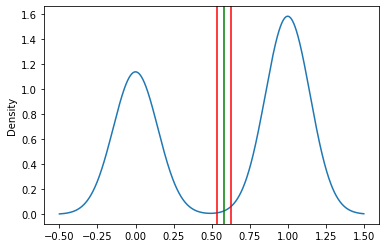

                Total Dems vote was 231                



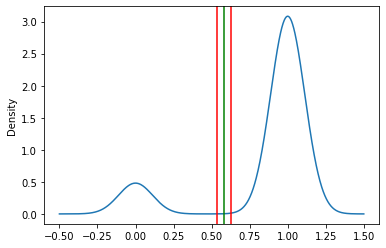

                 Total Reps vote was 22                



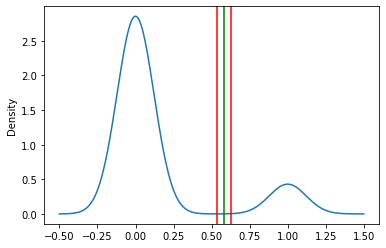

In [12]:
# Looking first at the budget bill -- Dems supported more than Reps

bill = 'budget'
ci_graph(bill)


                Total House vote was 177               



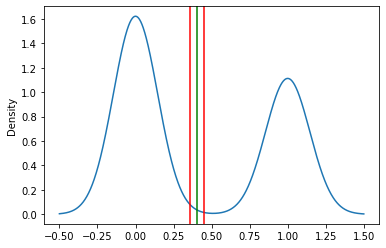

                 Total Dems vote was 14                



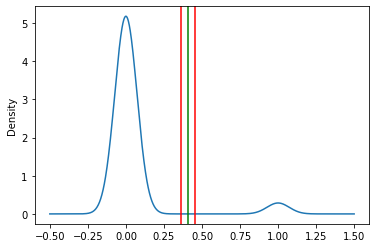

                Total Reps vote was 163                



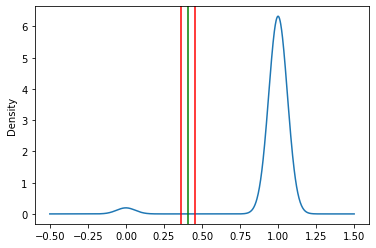

In [13]:
# Looking first at the budget bill -- Dems supported more than Reps

bill = 'physician-fee-freeze'
ci_graph(bill)

## Chi-squared tests:
Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data
By hand using Numpy
In a single line using Scipy

In [26]:
# Establish observed (obs) frequencies using crosstab
df = house
bill = 'education'
obs = pd.crosstab(df['party'], df[bill], margins=True)

print(obs)

education     0    1  All
party                    
democrat    231   36  267
republican   33  135  168
All         264  171  435


In [17]:
# ZACK
observed = pd.crosstab(df['party'], df['education'])

observed = observed.values

observed

array([[231,  36],
       [ 33, 135]])

In [46]:
# Get variables to compute chi square

# obs = np.np.array(obs)
obs
dem_n = obs[0,0]
dem_y = obs[0,1]
dem_t = obs[0,2]
rep_n = obs[1,0]
rep_y = obs[1,1]
rep_t = obs[1,2]
all_n = obs[2,0]
all_y = obs[2,1]
all_t = obs[2,2]

print(dem_n, dem_y, dem_t)
print(rep_n, rep_y, rep_t)
print(all_n, all_y, all_t)

231 36 267
33 135 168
264 171 435


In [53]:
# Compute expected variables

dem_n_e = (dem_t * all_n)/all_t
dem_y_e = (dem_t * all_y)/all_t
rep_n_e = (rep_t * all_n)/all_t
rep_y_e = (rep_t * all_y)/all_t
print(dem_n_e, dem_y_e)
print(rep_n_e, rep_y_e)


162.04137931034484 104.95862068965518
101.95862068965518 66.04137931034482


In [70]:
chi_sq = (((dem_n - dem_n_e)**2)/dem_n_e) + (((dem_y - dem_y_e)**2)/dem_y_e) +\
         (((rep_n - rep_n_e)**2)/rep_n_e) + (((rep_y - rep_y_e)**2)/rep_y_e)

print(chi_sq)

193.29664795767508


In [59]:
#chi squared using scipy 

st.chi2_contingency(obs)

(193.29664795767508,
 1.0371247640978589e-40,
 4,
 array([[162.04137931, 104.95862069, 267.        ],
        [101.95862069,  66.04137931, 168.        ],
        [264.        , 171.        , 435.        ]]))

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)